## FAILURE PREDICTION WITH AGGREGATED DATA

#### - **Name:** Vikranth Ale
#### - **Email:** alevikranth407@gmail.com
#### - **Date:** September 22nd, 2023

### 1. Loading Packages

In [1]:
# Importing required libraries

import pandas as pd
import numpy as np
from tqdm import tqdm_notebook as tqdm

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold,cross_validate
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

# Feature Selection & Feature extraction
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA

#Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# Stacking Models
from mlxtend.classifier import StackingCVClassifier

#Metrics & utils
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc #plot_roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score

# ETL Pipelines
import pyodbc
from sqlalchemy import create_engine

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Misc
import joblib  #import pickle
from time import time
from scipy import stats

import os
print('Current working directory')
print(os.getcwd())
print('')
print('Changed to working directory')
os.chdir(r'C:\Users\alevi\DS_HOME\AVL\datascience-challenge-main\Example_01')
print(os.getcwd())

import sys
print()
print(sys.version)

Current working directory
C:\Users\alevi\DS_HOME\AVL

Changed to working directory
C:\Users\alevi\DS_HOME\AVL\datascience-challenge-main\Example_01

3.11.3 | packaged by Anaconda, Inc. | (main, Apr 19 2023, 23:46:34) [MSC v.1916 64 bit (AMD64)]


### 1.1 LOADING RAW DATA

In [2]:
# Setting the project path directory and specifying the files to load

project_path = r'C:\Users\alevi\DS_HOME\AVL\datascience-challenge-main\Example_01'
files = ['data']

# creating a function to load files, helpful when loading multiple files

def load_data(file,file_path=project_path):
    csvfile = os.path.join(file_path,file +'.csv')
    return pd.read_csv(csvfile, sep=";")

# creating a pandas dataframe for analysis
data = load_data(files[0])

print("NUMBER OF ROWS IN THE DATASET: {}".format(data.shape[0]))
print("NUMBER OF COLUMNS IN THE DATASET: {}".format(data.shape[1]))
# data.to_csv("data_modified.csv")
data.head()

NUMBER OF ROWS IN THE DATASET: 5777
NUMBER OF COLUMNS IN THE DATASET: 31


,PSEUDO_VIN,TONDUR,EngSpDist_K1,EngSpDist_K2,EngSpDist_K3,EngSpDist_K4,EngSpDist_K5,EngSpDist_K6,EngSpDist_K7,EngSpDist_K8,...,AmbTempDist_K6,AmbTempDist_K7,AmbTempDist_K8,AmbTempDist_K9,AmbTempDist_K10,MILEAGE,DIAGNOSIS_DATE,REPAIR_DATE,TACHOMETER_IN_KM,LABEL
0,5247,1249456.1,239471.8,443507.3,230166.7,18955.4,3453.7,1631.0,748.4,373.2,...,317,416,155,0,0,35008,03.06.14,NaN,NaN,NO_DAMAGE
1,5405,2221482.5,868673.2,862615.7,154180.3,12707.2,2885.7,951.6,466.9,255.2,...,478,479,167,1,0,14959,10.08.15,NaN,NaN,NO_DAMAGE
2,1642,3433681.7,822744.4,1954545.1,366699.7,26077.9,1452.6,238.2,91.5,47.4,...,676,993,261,2,0,37685,30.01.15,NaN,NaN,NO_DAMAGE
3,4784,615134.7,138935.2,209138.3,106259.6,10133.9,1111.9,230.7,81.5,49.9,...,169,295,112,2,0,7054,02.04.15,NaN,NaN,NO_DAMAGE
4,3656,2141362.5,797644.6,729555.5,242742.9,13288.6,2374.5,815.7,341.1,175.1,...,358,750,229,2,1,19680,23.11.15,NaN,NaN,NO_DAMAGE


### 1.2 DATA PREPROCESSING

#### Converting  Categorical value into a Numerical value for theTarget variable

We can do label encoding for categorical in so many different ways by using packages from sci-kit learn like One hot encoding, label encoder etc.

For the sake of simplicity given that its a binary classification problem, i have used a  map function in pandas dataframe to achieve label encoding of the target variable

In [3]:
# Label Encoding of the target variable using map function
data['LABEL'] = data['LABEL'].map({'NO_DAMAGE':0,'DAMAGE':1})

#### Checking for missing values & Duplicates

In [4]:
def check_missing_duplicated(data):
    # checking NA and Missing values
    print('Number of NA\'s in the dataset')
    print(data.isna().sum())
    print('')
    print('Total missing values in the dataset')
    print(data.isnull().sum())

    # check for duplicates

    print('')
    print('Number of duplicates')
    print(data.duplicated().sum())
    duplicate_data = data[data.duplicated(keep=False)].sort_values(by=['MILEAGE'], ascending= False) 
    duplicate_data.head()
    
    # dropping duplicates
    data.drop_duplicates(inplace=True)
    print('Duplicates count after dropping : {}'.format(data.duplicated().sum()))
    print('Number of observations after dropping duplicates : {}'.format(len(data)))
    
check_missing_duplicated(data)

Number of NA's in the dataset
PSEUDO_VIN             0
TONDUR                 0
EngSpDist_K1           0
EngSpDist_K2           0
EngSpDist_K3           0
EngSpDist_K4           0
EngSpDist_K5           0
EngSpDist_K6           0
EngSpDist_K7           0
EngSpDist_K8           0
EngSpDist_K9           0
EngSpDist_K10          0
EngSpDist_K11          0
EngSpDist_K12          0
EngSpDist_K13          0
EngSpDist_K14          0
AmbTempDist_K1         0
AmbTempDist_K2         0
AmbTempDist_K3         0
AmbTempDist_K4         0
AmbTempDist_K5         0
AmbTempDist_K6         0
AmbTempDist_K7         0
AmbTempDist_K8         0
AmbTempDist_K9         0
AmbTempDist_K10        0
MILEAGE                0
DIAGNOSIS_DATE         0
REPAIR_DATE         5441
TACHOMETER_IN_KM    5441
LABEL                  0
dtype: int64

Total missing values in the dataset
PSEUDO_VIN             0
TONDUR                 0
EngSpDist_K1           0
EngSpDist_K2           0
EngSpDist_K3           0
EngSpDist_K4        

- It is important to understand if the dataset has any missing or null values, as we cannot give the data with missing values to the model.

- From the above result, we can observe that the feature columns doesnt have any missing value except for the columns REPAIR_DATE and TACHOMETER_IN_KM which has 5441 null values.

This is because these columns has a value only when the vehicle has been reported DAMAGE which is also mentioned in the dataset description.

Also, we have to handle missing values in such a way that we are not introducing any bias in the date while training the model. Adopting right imputation techniques is important.

-  Total number of vehicles in the dataset = 5777
-  No. of missing values (without Repair)  = 5441

-  Vehicles that are reported as DAMAGE    = 336

### 1.3 EXPLORATORY DATA ANALYSIS

#### EDA CONSIDERATIONS

**To exclude from analysis**
- Column **PSEUDO_VIN** as it is VIN for each individual vehicle
- Column **EngSpDist_K14**  has all values as zeros, the idling time decreases from k1 to k14
- Column **AmbTempDist_K1** has all zeroes except for 3 vehicles without DAMAGED condition, it is least significant for analysis 
- Column **AmbTempDist_K2** has all zeroes except for 4 vehicles without DAMAGED condition, it is least significant for analysis
- Column **AmbTempDist_K3** has 99.9 percentage of its values as zeros, it contributes to 0.01 percentage of DAMAGED vehicles.
- Column **DIAGNOSIS_DATE** has no much significance in predicting the target variable
- Column **REPAIR_DATE** has no much significance in predicting the target variable
- Column **TACHOMETER_IN_KM** has no much significance as the value is highly correlated to MILEAGE


**Reasons for exclusion**
-  PSEUDO_VIN is a vehicle is an identifier which doesnt hold much significance as model input
-  EngSpDist_K14 has all values as zeros , the engine speed distribution decreases as we move from K1 to K14
-  AmbTempDist_K1, AmbTempDist_K2, AmbTempDist_K3 has most of its values as zeros, i think its safe to right away exclude          them from our analysis.
-  DIAGNOSIS_DATE which is in string format is not a valid input for a ML model so it is safe to exclude it.
-  REPAIR_DATE column has information about the vehicle when it was repaired, in most cases it the following day after damage      and we cannot feed date as input to the model.
-  TACHOMETER_IN_KM is excluded as it is collinear to MILEAGE column

From my analysis, I have decided to exclude the columns REPAIR_DATE and TACHOMETER_IN_KM, this is because these features doesnt have much information to make a good model.

#### Dropping columns based on above conditions

In [5]:
eda_df = data.drop(['PSEUDO_VIN','EngSpDist_K14', 'AmbTempDist_K1','AmbTempDist_K2','AmbTempDist_K3','DIAGNOSIS_DATE','REPAIR_DATE',
                    'TACHOMETER_IN_KM'], axis=1)

# eda_df.to_csv('temp_df.csv')
eda_df.columns

Index(['TONDUR', 'EngSpDist_K1', 'EngSpDist_K2', 'EngSpDist_K3',
       'EngSpDist_K4', 'EngSpDist_K5', 'EngSpDist_K6', 'EngSpDist_K7',
       'EngSpDist_K8', 'EngSpDist_K9', 'EngSpDist_K10', 'EngSpDist_K11',
       'EngSpDist_K12', 'EngSpDist_K13', 'AmbTempDist_K4', 'AmbTempDist_K5',
       'AmbTempDist_K6', 'AmbTempDist_K7', 'AmbTempDist_K8', 'AmbTempDist_K9',
       'AmbTempDist_K10', 'MILEAGE', 'LABEL'],
      dtype='object')

In [6]:
### Understanding the distribution of data
# slicing the columns into two parts for better understanding
eda_df.iloc[:,:11].describe().applymap('{:.2f}'.format)

,TONDUR,EngSpDist_K1,EngSpDist_K2,EngSpDist_K3,EngSpDist_K4,EngSpDist_K5,EngSpDist_K6,EngSpDist_K7,EngSpDist_K8,EngSpDist_K9,EngSpDist_K10
count,5777.00,5777.00,5777.00,5777.00,5777.00,5777.00,5777.00,5777.00,5777.00,5777.00,5777.00
mean,1638604.10,694980.98,565957.03,152332.89,17916.95,2744.95,769.36,343.03,181.54,107.44,77.47
std,1478633.71,728006.89,551052.30,169803.32,31982.03,6069.91,1871.40,803.76,481.11,328.39,254.51
min,16923.10,4641.30,406.60,30.30,10.40,3.40,0.90,0.20,0.00,0.00,0.00
25%,644381.10,235283.70,194769.80,46019.80,3302.40,609.40,88.60,33.90,15.40,5.60,2.10
50%,1167932.20,463437.00,388605.10,99584.80,8232.30,1166.80,261.90,103.90,47.70,19.70,9.20
75%,2111712.60,862377.00,729288.40,195335.10,19650.90,2629.40,753.30,319.20,153.10,78.00,46.70
max,11511456.40,6959281.00,4262310.00,2453756.80,646982.90,152502.20,74583.60,25328.50,16623.10,12139.10,7602.50


In [7]:
eda_df.iloc[:,11:].describe().applymap('{:.2f}'.format)

,EngSpDist_K11,EngSpDist_K12,EngSpDist_K13,AmbTempDist_K4,AmbTempDist_K5,AmbTempDist_K6,AmbTempDist_K7,AmbTempDist_K8,AmbTempDist_K9,AmbTempDist_K10,MILEAGE,LABEL
count,5777.00,5777.00,5777.00,5777.00,5777.00,5777.00,5777.00,5777.00,5777.00,5777.00,5777.00,5777.00
mean,46.96,22.73,0.08,1.03,11.72,107.39,331.06,507.20,194.07,12.81,13322.32,0.06
std,152.30,88.33,1.75,8.68,43.50,182.87,330.77,447.36,282.86,40.44,13254.92,0.23
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1002.00,0.00
25%,0.80,0.00,0.00,0.00,0.00,10.00,113.00,206.00,19.00,0.00,4485.00,0.00
50%,4.40,1.20,0.00,0.00,0.00,36.00,226.00,376.00,87.00,0.00,9330.00,0.00
75%,26.30,9.40,0.00,0.00,4.00,128.00,433.00,652.00,250.00,4.00,17187.00,0.00
max,3852.80,2799.50,120.50,395.00,1016.00,2592.00,3874.00,5947.00,2579.00,685.00,157940.00,1.00


From the above result is clear that the data is not normally distributed,  most of the data is skewwed toward the left and centering at zero for most features.

**Observations**
- The engine speed distribution values decreases and becomes zero in most case for each feature as we move from left to right i.e EngSpDist_K1 to EngSpDist_K14,  as there is no idling of engine

- The ambient temperature distribution values increases for each feature as we move from left to right i.e AmbTempDist_K1 to AmbTempDist_K10

#### Feature distribution

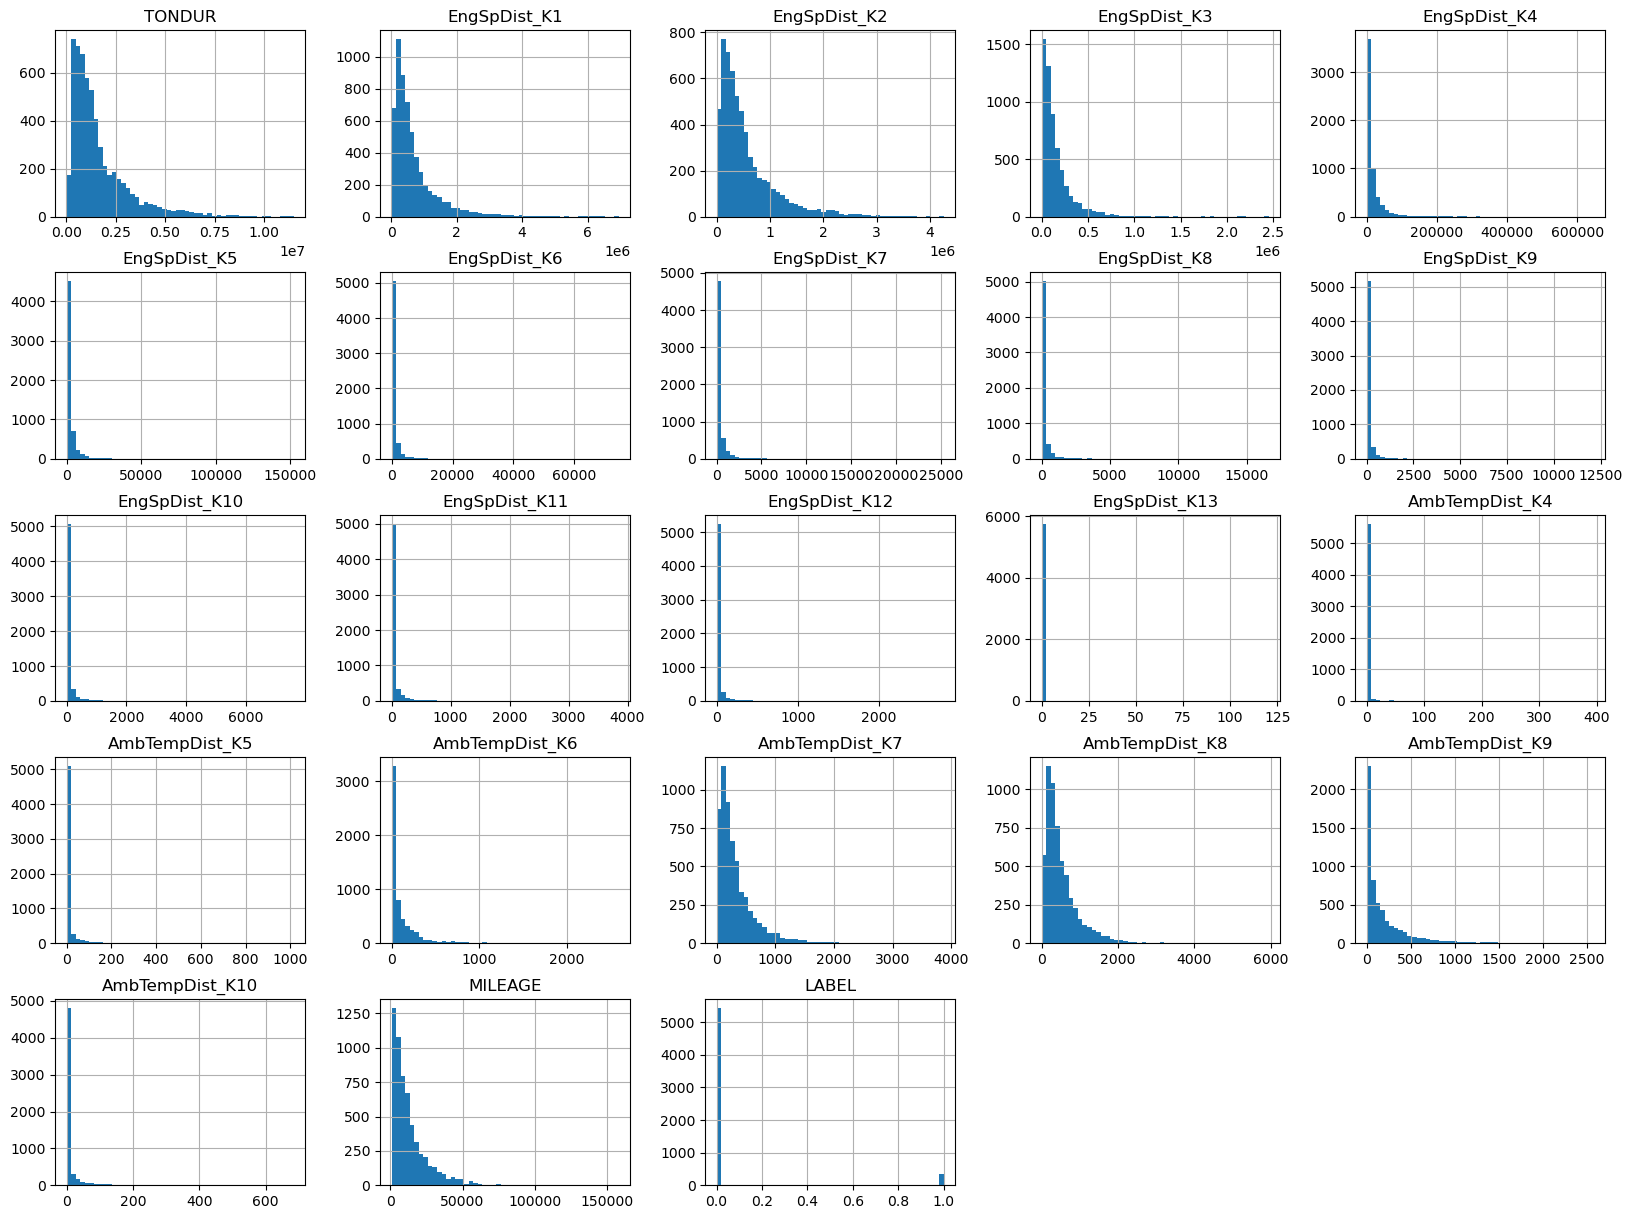

In [8]:
%matplotlib inline
 
eda_df.hist(bins=50,figsize=(20,15))
# plt.savefig('features_distribution.png')
plt.show()

From the above distribution graphs for each feature, it is evident that the data is left-skewwed

#### Correlation Heatmap

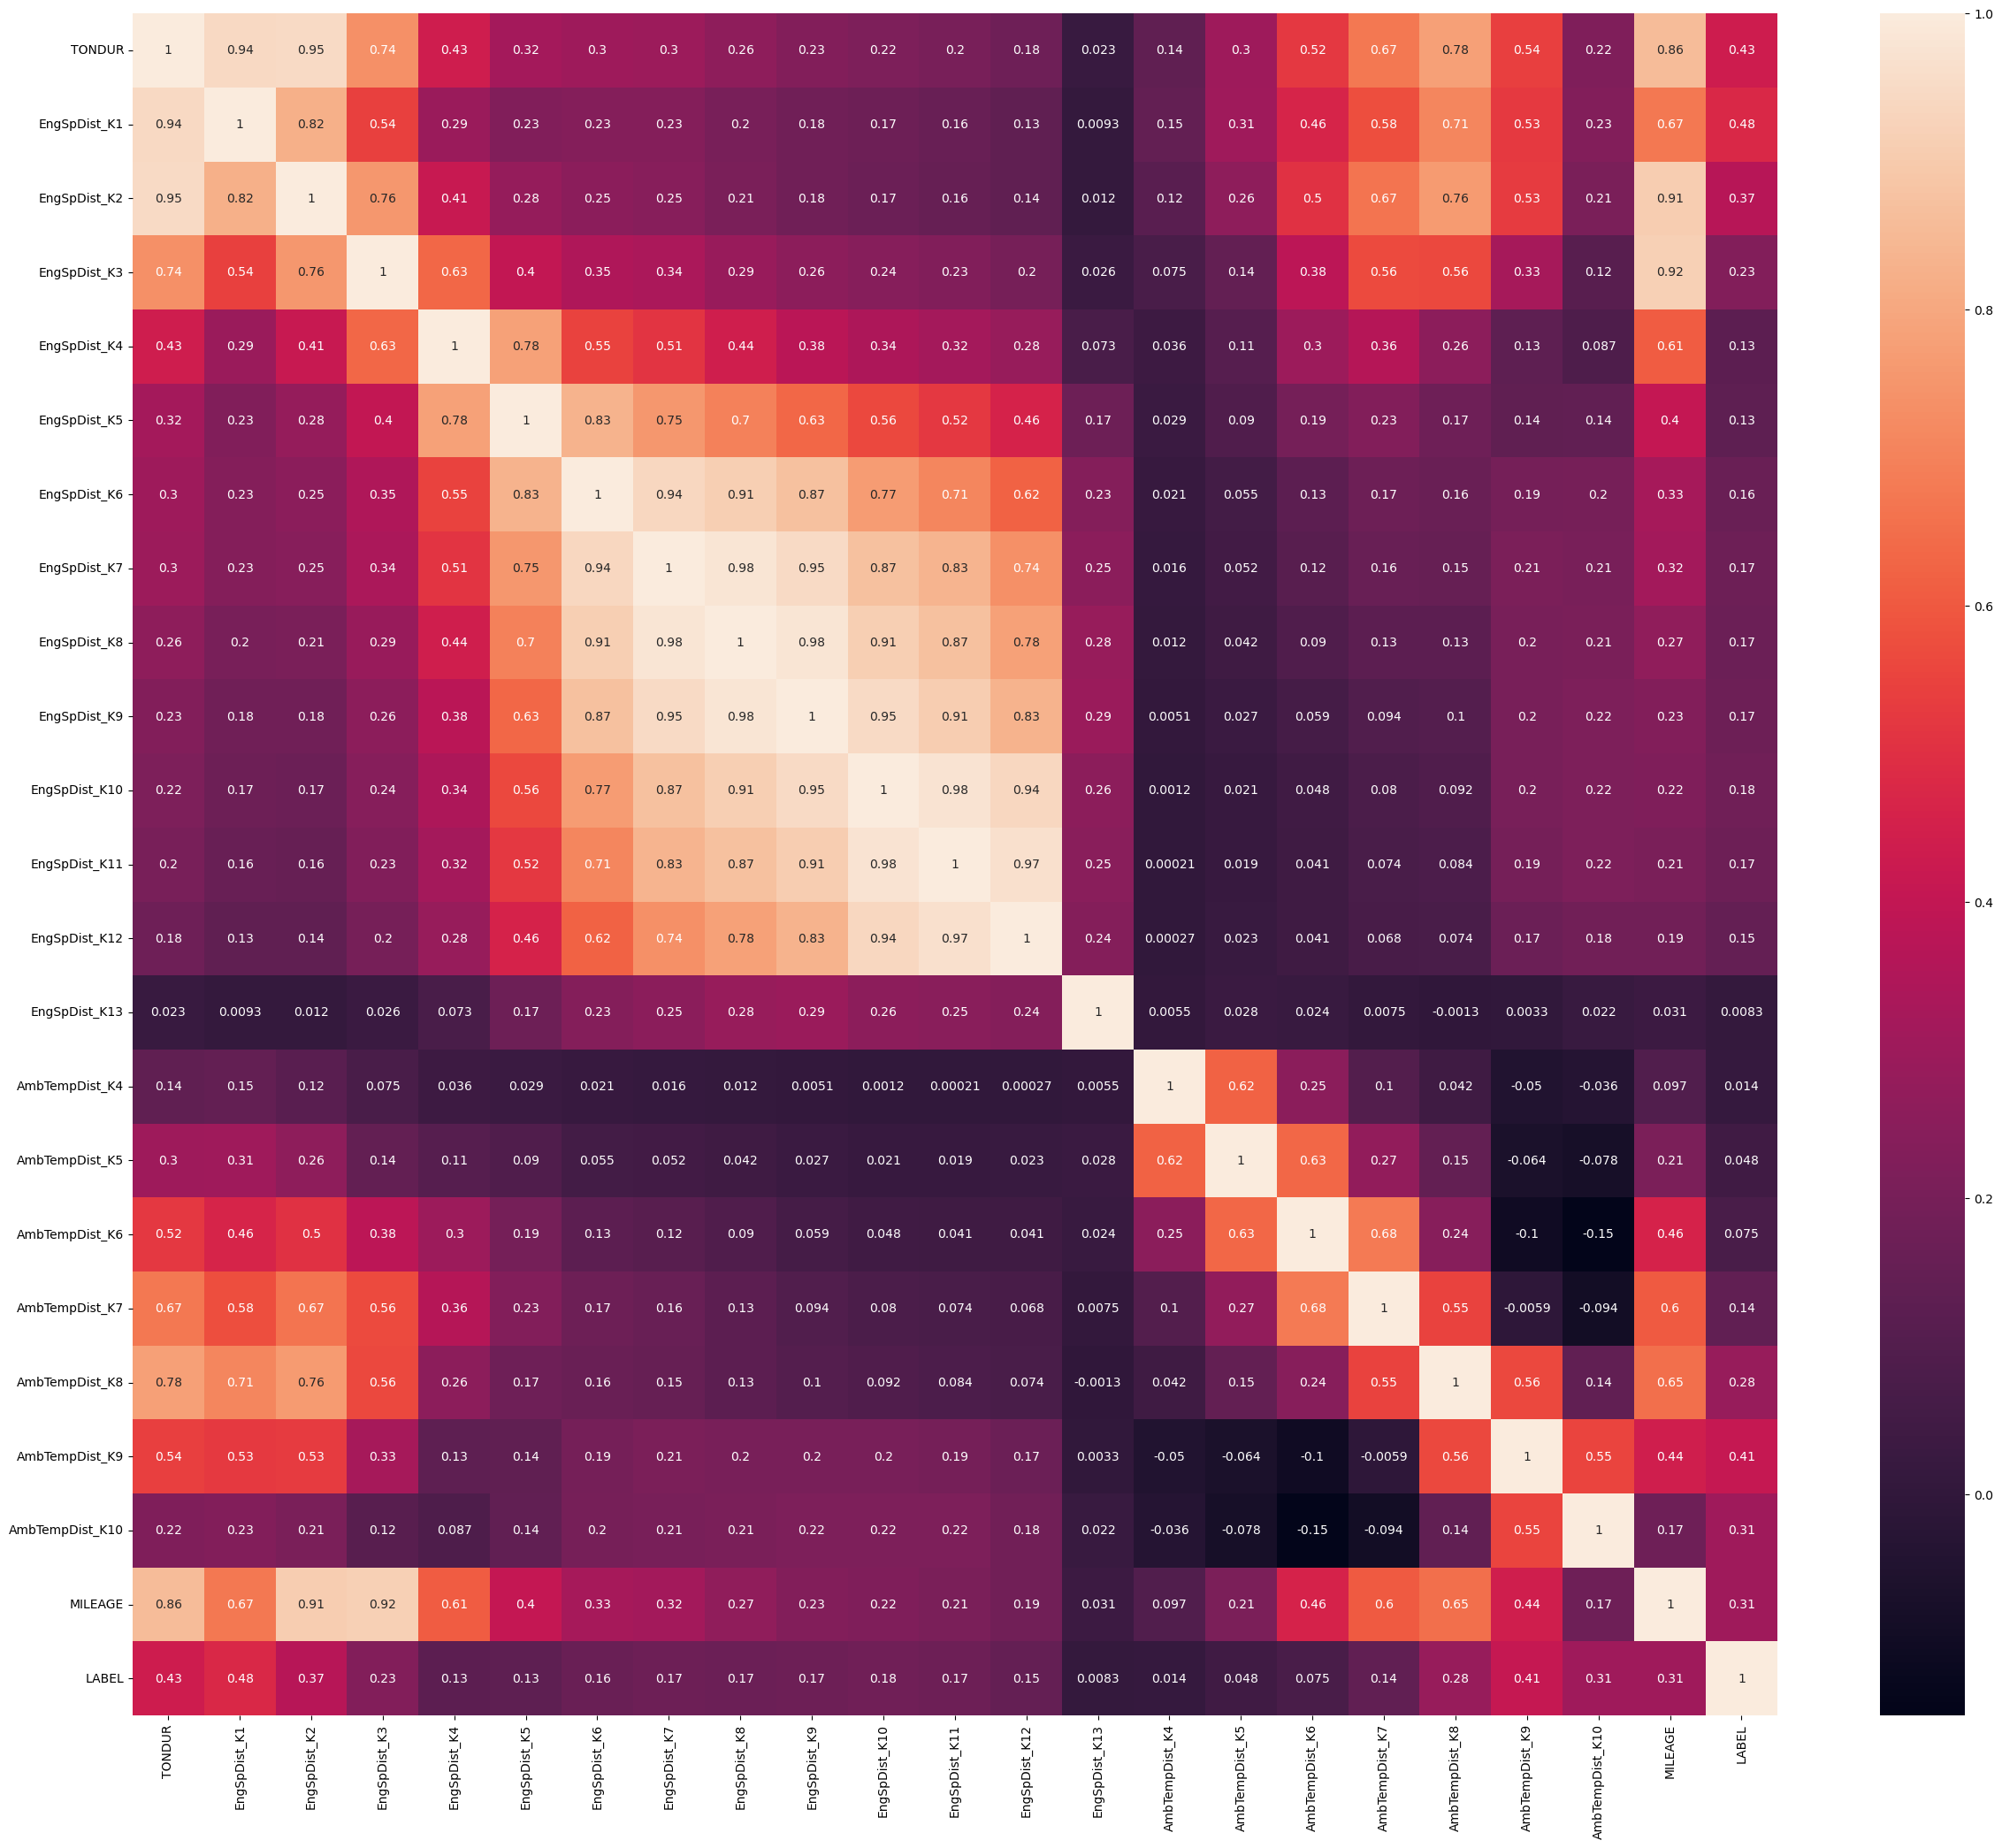

In [9]:
# correlation among the features 

plt.figure(figsize=(30,25))
sns.heatmap(eda_df.corr(),annot=True)
# plt.savefig('correlation_11.png')
plt.show()

From the above correlation plot, you can observe how each feature is correlated to other

- The maximum correlation among features as measured as pearson coefficient is observed to be 0.98 
  for example between  EngSpDist_K7 & EngSpDist_K8
  
- The minimum correlation among features is found to be -0.15  between AmbTempDist_K6 & AmbTempDist_K10

#### TOP 10 CORRELATIONS WITH TARGET VARIABLE

In [10]:
# map features to their absolute correlation values
corr_matrix = eda_df.corrwith(eda_df['LABEL'])

# set equality (self correlation) as zero
corr_matrix[corr_matrix == 1] = 0

# of each feature, find the max correlation
# and sort the resulting array in ascending order
corr = corr_matrix.sort_values(ascending=False)

column_name = {0:'PearsonCoefficient'}
corr = pd.DataFrame(corr,columns=column_name)
corr.rename(columns=column_name,inplace=True)

corr.head(10)

,PearsonCoefficient
EngSpDist_K1,0.477540
TONDUR,0.432556
AmbTempDist_K9,0.410071
EngSpDist_K2,0.371472
AmbTempDist_K10,0.308486
MILEAGE,0.307877
AmbTempDist_K8,0.282363
EngSpDist_K3,0.230834
EngSpDist_K10,0.180761
EngSpDist_K7,0.172328


It is interesting to know the top 10 correlated features with the targer variable.

### 1.4  FEATURE SELECTION & FEATURE EXTRACTION


The chi-square test is a statistical method that can be used for feature selection in machine learning. It is used to determine whether there is a significant association between two features that are most strongly associated with the target variable.

The chi-square test involves calculating the chi-square statistic, which is a measure of the difference between the observed frequency of each category and the expected frequency under the null hypothesis of no association between the variables.

#### CHI-SQUARED ANALYSIS

In [11]:
from sklearn.feature_selection import SelectKBest,chi2
from scipy import stats

# copying data to a new dataframe

fsel_df = eda_df.copy()

#Preparing the data for ChiSquared statistical analysis 
chi_X = fsel_df.drop('LABEL',axis=1)
chi_y = fsel_df['LABEL']

# Convert to categorical data by converting data to integers
# X = X.astype(int)

# Select 20 features with highest chi-squared statistics
chi2_selector = SelectKBest(chi2, k=12)
chi2_selector.fit_transform(chi_X,chi_y)


# Look at scores returned from the selector for each feature
chi2_scores = pd.DataFrame(list(zip(fsel_df.columns, chi2_selector.scores_, chi2_selector.pvalues_)), columns=['Feature', 'ChiScore', 'P-value'])
chi2_scores

# you can see that the kbest returned from SelectKBest 
#+ were the features with the _highest_ score
kbest = np.asarray(chi_X.columns)[chi2_selector.get_support()]
kbest

array(['TONDUR', 'EngSpDist_K1', 'EngSpDist_K2', 'EngSpDist_K3',
       'EngSpDist_K4', 'EngSpDist_K5', 'EngSpDist_K6', 'EngSpDist_K7',
       'EngSpDist_K8', 'AmbTempDist_K8', 'AmbTempDist_K9', 'MILEAGE'],
      dtype=object)

ChiSquared Analysis for feature selection is adopted because it is important to understand statistically what the underlying data tells about features contribution to determine the target variable.

#### Features selected by CHI-SQUARED ANALYSIS

In [12]:
feng_df =  fsel_df[['TONDUR', 'EngSpDist_K1', 'EngSpDist_K2', 'EngSpDist_K3','EngSpDist_K4', \
                    'EngSpDist_K5', 'EngSpDist_K6', 'EngSpDist_K7','EngSpDist_K8', 'AmbTempDist_K8', \
                    'AmbTempDist_K9', 'MILEAGE','LABEL']]
# copy to sql 
etl1_df = feng_df.copy()

etl2_df = data[['PSEUDO_VIN','TONDUR', 'EngSpDist_K1', 'EngSpDist_K2', 'EngSpDist_K3','EngSpDist_K4', \
                    'EngSpDist_K5', 'EngSpDist_K6', 'EngSpDist_K7','EngSpDist_K8', 'AmbTempDist_K8', \
                    'AmbTempDist_K9', 'MILEAGE','LABEL']]

feng_df.head()

,TONDUR,EngSpDist_K1,EngSpDist_K2,EngSpDist_K3,EngSpDist_K4,EngSpDist_K5,EngSpDist_K6,EngSpDist_K7,EngSpDist_K8,AmbTempDist_K8,AmbTempDist_K9,MILEAGE,LABEL
0,1249456.1,239471.8,443507.3,230166.7,18955.4,3453.7,1631.0,748.4,373.2,155,0,35008,0
1,2221482.5,868673.2,862615.7,154180.3,12707.2,2885.7,951.6,466.9,255.2,167,1,14959,0
2,3433681.7,822744.4,1954545.1,366699.7,26077.9,1452.6,238.2,91.5,47.4,261,2,37685,0
3,615134.7,138935.2,209138.3,106259.6,10133.9,1111.9,230.7,81.5,49.9,112,2,7054,0
4,2141362.5,797644.6,729555.5,242742.9,13288.6,2374.5,815.7,341.1,175.1,229,2,19680,0


In [13]:
feng_df.corr()

,TONDUR,EngSpDist_K1,EngSpDist_K2,EngSpDist_K3,EngSpDist_K4,EngSpDist_K5,EngSpDist_K6,EngSpDist_K7,EngSpDist_K8,AmbTempDist_K8,AmbTempDist_K9,MILEAGE,LABEL
TONDUR,1.000000,0.942753,0.949634,0.736674,0.434739,0.321017,0.300841,0.297508,0.260345,0.777602,0.541688,0.857315,0.432556
EngSpDist_K1,0.942753,1.000000,0.824664,0.543093,0.291304,0.227268,0.232988,0.233282,0.204049,0.709124,0.526131,0.672740,0.477540
EngSpDist_K2,0.949634,0.824664,1.000000,0.755047,0.414091,0.279614,0.253269,0.245048,0.208167,0.764451,0.528799,0.907540,0.371472
EngSpDist_K3,0.736674,0.543093,0.755047,1.000000,0.634493,0.401854,0.348203,0.339740,0.290677,0.562030,0.325424,0.915851,0.230834
EngSpDist_K4,0.434739,0.291304,0.414091,0.634493,1.000000,0.781832,0.549923,0.510910,0.440632,0.256322,0.132248,0.607583,0.125566
EngSpDist_K5,0.321017,0.227268,0.279614,0.401854,0.781832,1.000000,0.832071,0.753707,0.697859,0.174206,0.136744,0.403368,0.133549
EngSpDist_K6,0.300841,0.232988,0.253269,0.348203,0.549923,0.832071,1.000000,0.940674,0.911522,0.164096,0.193425,0.326529,0.161781
EngSpDist_K7,0.297508,0.233282,0.245048,0.339740,0.510910,0.753707,0.940674,1.000000,0.980148,0.152148,0.211874,0.315811,0.172328
EngSpDist_K8,0.260345,0.204049,0.208167,0.290677,0.440632,0.697859,0.911522,0.980148,1.000000,0.125254,0.201500,0.267687,0.169272
AmbTempDist_K8,0.777602,0.709124,0.764451,0.562030,0.256322,0.174206,0.164096,0.152148,0.125254,1.000000,0.562603,0.651927,0.282363


### DIMENSIONALITY REDUCTION USING PCA


Principal Component Analysis is a feature extraction technique used to reduce the dimensionality of a dataset while preserving the most important patterns or relationships between the variables without any prior knowledge of the target variables.

It helps in reducing the number of variables to select the most important variables in cases where the number of variables is very large as it is difficult to identify them.

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Preparing the data for PCA analysis 
pca_X = fsel_df.drop('LABEL',axis=1)
pca_y = fsel_df['LABEL']


# Scaling the Data and Creating the array
scaler = StandardScaler()

pca_X = scaler.fit_transform(pca_X.values)
pca_y = pca_y.values

# covariance matrix
pca_cov_matrix = PCA(n_components=12)

# calculate eigen values
pca_cov_matrix.fit(pca_X)
X_pc = pca_cov_matrix.transform(pca_X)

variance_ratio = pca_cov_matrix.explained_variance_ratio_
var = np.cumsum(np.round(variance_ratio,3)*100)[::-1]


# Explained variance gives us an idea of the amount of the total variance which has been retained 
# by selecting the principal components instead of the original feature space
print('Features with Eigen value One Criteria')
print(pca_cov_matrix.explained_variance_)

print('-------')
print('Cumulative sum of variance explained with [n] features')
print(var)


# number of components
pca_components = pca_cov_matrix.n_components_

# get the index of the most important feature on EACH component
most_important = [np.abs(pca_cov_matrix.components_[i]).argmax() for i in range(pca_components)]

initial_feature_names = fsel_df.columns
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(pca_components)][::-1]

print('-------')
print('Variance explained with feature names')
print(most_important_names)

# Dictionary of PCA Components with Features
dic = {'PC{}'.format(i): most_important_names[i] for i in range(pca_components)}

# build the dataframe with component and feature name (best feature of each component)
df = pd.DataFrame(dic.items(),columns=['COMPONENT','FEATURE'])

# DATASET after PCA
# Reduced dataset after applying PCA 
pca_df = pd.DataFrame(X_pc,columns=dic.keys())

pca_df['LABEL'] = fsel_df['LABEL']

# pca_df.to_csv('pca_df.csv')
print('')
print('Number rows dropping : {}'.format(len(pca_df[pca_df['LABEL'].isna()].index)))

pca_df = pca_df.drop(pca_df[pca_df['LABEL'].isna()].index)

Features with Eigen value One Criteria
[8.62423207 4.85730628 2.12454609 1.44944694 1.06708066 0.89918148
 0.6502059  0.60066566 0.41142974 0.33901622 0.28315195 0.20489073]
-------
Cumulative sum of variance explained with [n] features
[97.8 96.9 95.6 94.1 92.2 89.5 86.5 82.4 77.6 71.  61.3 39.2]
-------
Variance explained with feature names
['AmbTempDist_K9', 'EngSpDist_K1', 'EngSpDist_K4', 'AmbTempDist_K7', 'AmbTempDist_K10', 'AmbTempDist_K10', 'EngSpDist_K13', 'AmbTempDist_K4', 'AmbTempDist_K4', 'AmbTempDist_K9', 'EngSpDist_K2', 'EngSpDist_K7']

Number rows dropping : 0


In PCA, the information is carried in the variance of the features, the higher the variation in a feature, the more information that features carries.

I have implemented PCA using scikit learn package by calculating eigen values.

In the above result,  if eigenvalue > 1 indicates that PCs account for more variance than accounted by one of the original variables in standardized data

The eigenvalues measure the amount of variation retained by each principal component. Eigenvalues are large for the first PCs and small for the subsequent PCs. The first PCs corresponds to the directions with the maximum amount of variation in the data set.

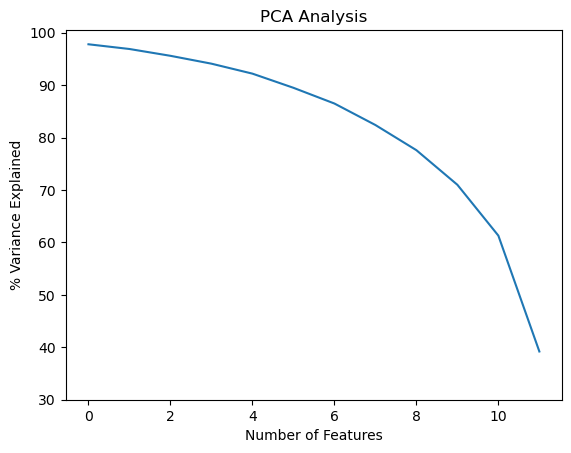

In [15]:
plt.ylabel('% Variance Explained')
plt.xlabel('Number of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.savefig('pca_analysis.png')
plt.plot(var)
plt.show()

In the above plot, you can observe that the first principal component PC0 retains almost 89.5 % of the data, PC1 retains 86.5 % of the data and so on.

In [16]:
pca_df.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,LABEL
0,1.038971,0.504853,1.139990,-0.750586,0.304985,-0.336287,-0.078087,-1.175082,-0.191983,0.928604,0.173019,0.419118,0
1,0.545141,-0.492465,1.391367,-0.211978,0.698907,-0.303620,-1.122616,-0.347875,-0.216303,0.716473,-0.554598,0.570582,0
2,1.639963,-3.352051,1.611641,-1.153836,1.228706,-0.254429,-1.062518,-1.650706,0.192463,1.208282,-0.411057,1.223797,0
3,-1.560808,0.648257,0.699797,-0.428429,0.122336,-0.065887,-0.283116,-0.398772,0.050314,0.208507,-0.023960,0.312108,0
4,0.377322,-0.996121,1.203526,-0.646424,0.700324,-0.219246,-0.766004,-0.555288,0.396265,0.627837,-0.237022,0.406252,0


#### SPLITTING THE DATA INTO TRAINING & TEST DATASETS

In [18]:
# Taking the raw data as input for stacking
X = feng_df.drop('LABEL',axis=1)
y = feng_df['LABEL']

print(X.columns)

# Scaling the Data and Creating the array
scaler = StandardScaler()

# X = normalize.fit_transform(X.values)
Xx = scaler.fit_transform(X.values)

# X = scaler.fit_transform(X.values)

yy = y.values


# To train the stacked model and verify the results
Xtrain, Xtest, ytrain, ytest = train_test_split(Xx,yy,stratify=y,test_size=0.3,random_state=103)

print('TRAINING SIZE : {}'.format(Xtrain.shape))

print('TESTING SIZE : {}'.format(Xtest.shape))

Index(['TONDUR', 'EngSpDist_K1', 'EngSpDist_K2', 'EngSpDist_K3',
       'EngSpDist_K4', 'EngSpDist_K5', 'EngSpDist_K6', 'EngSpDist_K7',
       'EngSpDist_K8', 'AmbTempDist_K8', 'AmbTempDist_K9', 'MILEAGE'],
      dtype='object')
TRAINING SIZE : (4043, 12)
TESTING SIZE : (1734, 12)


#### PCA INPUT

In [21]:
# PCA Input data 
pc_X = pca_df.drop('LABEL',axis=1)
pc_y = pca_df['LABEL']


# Scaling the Data and Creating the array
scaler = StandardScaler()

pc_X = scaler.fit_transform(pc_X.values)
pc_y = pc_y.values


Xtrain, Xtest, ytrain, ytest = train_test_split(pc_X,pc_y,stratify=pc_y,test_size=0.2,random_state=103)

print('TRAINING SIZE : {}'.format(Xtrain.shape))

print('TESTING SIZE : {}'.format(Xtest.shape))

TRAINING SIZE : (4621, 7)
TESTING SIZE : (1156, 7)


In the above, now the information retained by our Principal components is now separated as features and target variable, then  we standardize the values of the feature variables.

The data is split in ratios such as,  80 percent data goes for training and 20 percent for test sets. We have also set the random_state = 103 for reproducability of the model results.

## LOGISTIC REGRESSION

Logistic Regression is the basic and simplest algorithm that we can use for a classification problem. It performs well and can be used for most binary classification problems, but it is important to test other Machine Learning algorithms and compare the results.

ACCURACY OF THE MODEL : 95.39 %

CLASSIFICATION REPORT
              precision    recall  f1-score   support

   No Damage       0.96      0.99      0.98      1633
      Damage       0.71      0.35      0.47       101

    accuracy                           0.95      1734
   macro avg       0.84      0.67      0.72      1734
weighted avg       0.95      0.95      0.95      1734


CONFUSION MATRIX


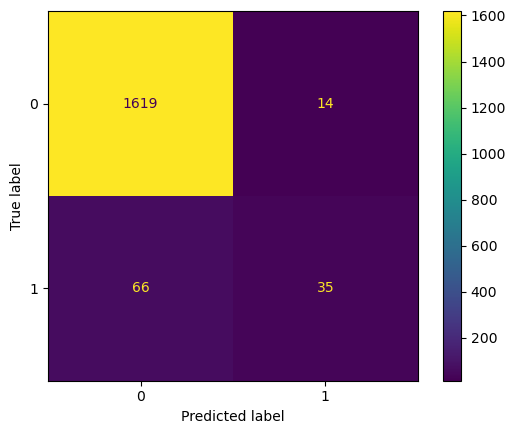

In [19]:
def logistic_regression(Xtrain,ytrain,Xtest,ytest):
    logit = LogisticRegression(C=0.7,penalty='l2',fit_intercept=True)
    logit.fit(Xtrain,ytrain)
    print('ACCURACY OF THE MODEL : {} %'.format(round(logit.score(Xtest,ytest)* 100,2)))
    y_logit_pred = logit.predict(Xtest)
    print('')
    print('CLASSIFICATION REPORT')
    target_names = ['No Damage', 'Damage']
    print(classification_report(ytest,y_logit_pred, target_names=target_names))
    print('')
    print('CONFUSION MATRIX')
    confusionMatrix = confusion_matrix(ytest,y_logit_pred)
    ConfusionMatrixDisplay(confusionMatrix).plot()

logistic_regression(Xtrain,ytrain,Xtest,ytest)

In the above we have written a simple function to implement Logistic regression model that takes input training and test data.

While training the above model, I have experiemented with various values of C from 0.1 to 1.5,  C is a regularization parameter that controls the strength of the regularization penalty and the bias-variance tradeoff. We have applied L2 type of regularization for this model.

Once the model has been trained, we have assessed the model on test data and calculated the model accuracy to be 95.39 % after several experiements.

From the above we can observe, the model results has TP = 1619, TN = 35 , FN = 66, FP = 14 

Looking at the classification report, we can observe the precision, recall and other metrics for this model.

## DECISION TREE CLASSIFIER

Decision Tree classifier is an classification model by building a decision tree. Each node in the tree specifies a test on an attribute, each branch descending from that node corresponds to one of the possible values for that attribute.

ACCURACY OF THE MODEL : 93.31 %

CLASSIFICATION REPORT
              precision    recall  f1-score   support

   No Damage       0.96      0.97      0.96      1633
      Damage       0.41      0.35      0.38       101

    accuracy                           0.93      1734
   macro avg       0.69      0.66      0.67      1734
weighted avg       0.93      0.93      0.93      1734


CONFUSION MATRIX


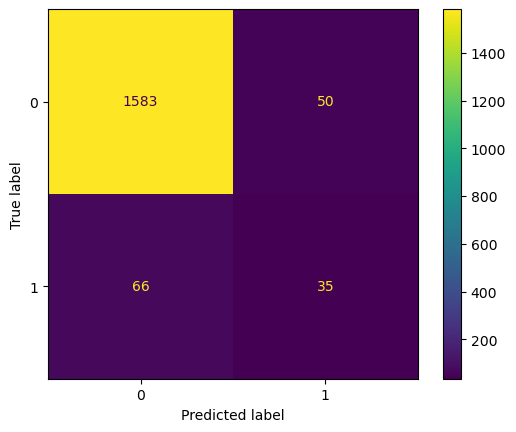

In [20]:
def decision_tree(Xtrain,ytrain,Xtest,ytest):
    Dtree =  DecisionTreeClassifier(criterion='log_loss', splitter='best', max_depth=None, min_samples_split=2)
    Dtree.fit(Xtrain,ytrain)
    print('ACCURACY OF THE MODEL : {} %'.format(round(Dtree.score(Xtest,ytest)* 100,2)))
    y_dt_pred = Dtree.predict(Xtest)
    print('')
    print('CLASSIFICATION REPORT')
    target_names = ['No Damage', 'Damage']
    print(classification_report(ytest,y_dt_pred, target_names=target_names))
    print('')
    print('CONFUSION MATRIX')
    confusionMatrix = confusion_matrix(ytest,y_dt_pred)
    ConfusionMatrixDisplay(confusionMatrix).plot()
    
decision_tree(Xtrain,ytrain,Xtest,ytest)

For decision tree classifier, we have experimented with few hyperparameters and the above gives us the best results with less False Negative values.

Criterion measures the quality of a split, splitter chose how to split the data at node, max_depth gives the maximum depth of the tree.

The model is first trained on training data and then on test data, the model gives better results for above combinations with a  score of 93.37 % 

Looking at confusion matrix we can observe TP = 1582 , TN = 37 , FP = 51 and FN = 64


## RANDOM FOREST CLASSIFIER

Random Forest classifier is the most commonly used ML model, it combines the output of multiple decision trees to reach a single result. It adds additional randomness to the model and it searches for the best feature among a random subset of features instead of most important feature.

ACCURACY OF THE MODEL : 94.75 %

CLASSIFICATION REPORT
              precision    recall  f1-score   support

   No Damage       0.95      0.99      0.97      1633
      Damage       0.65      0.22      0.33       101

    accuracy                           0.95      1734
   macro avg       0.80      0.61      0.65      1734
weighted avg       0.94      0.95      0.94      1734


FEATURE IMPORTANCE
[0.13730848 0.19321111 0.09965636 0.05883233 0.05005014 0.0449918
 0.04562883 0.04900857 0.05104554 0.06714066 0.12986895 0.07325722]

PLOTTING FEATURE IMPORTANCE


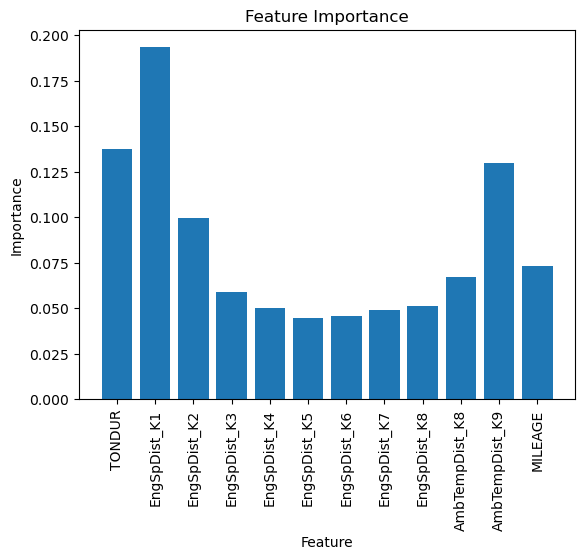


CONFUSION MATRIX


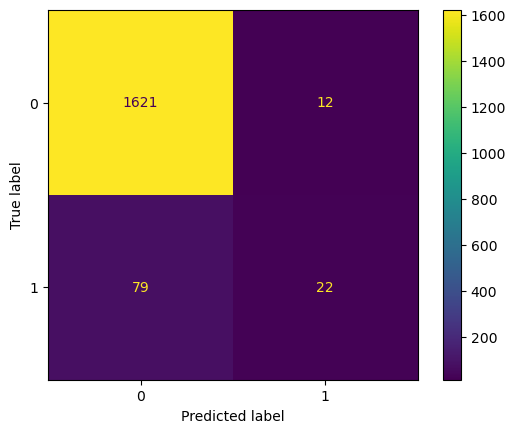

In [21]:
def random_forest(Xtrain,ytrain,Xtest,ytest):
    RForest = RandomForestClassifier(n_estimators=500,max_features=0.25,criterion='log_loss')
    RForest.fit(Xtrain,ytrain)
    print('ACCURACY OF THE MODEL : {} %'.format(round(RForest.score(Xtest,ytest)* 100,2)))
    y_rf_pred = RForest.predict(Xtest)
    print('')
    print('CLASSIFICATION REPORT')
    target_names = ['No Damage', 'Damage']
    print(classification_report(ytest,y_rf_pred, target_names=target_names))
    print('')
    print('FEATURE IMPORTANCE')
    print(RForest.feature_importances_)
    print('')
    print('PLOTTING FEATURE IMPORTANCE')
    feature_names = ['TONDUR', 'EngSpDist_K1', 'EngSpDist_K2', 'EngSpDist_K3','EngSpDist_K4', \
                     'EngSpDist_K5', 'EngSpDist_K6', 'EngSpDist_K7','EngSpDist_K8', \
                     'AmbTempDist_K8', 'AmbTempDist_K9', 'MILEAGE']
    
    plt.bar(range(len(RForest.feature_importances_)), RForest.feature_importances_)
    plt.xticks(range(len(RForest.feature_importances_)), feature_names, rotation=90)
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.title('Feature Importance')
    plt.show()
    print('')
    print('CONFUSION MATRIX')
    confusionMatrix = confusion_matrix(ytest,y_rf_pred)
    ConfusionMatrixDisplay(confusionMatrix).plot()
    
random_forest(Xtrain,ytrain,Xtest,ytest)

Random forest classifier is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In the above result, we can observe the model performs better than decision tree classifier with accuracy score of 94.81 %

## SUPPORT VECTOR CLASSIFIER

Support Vector Machine (SVM) is a powerful machine learning algorithm used for linear or nonlinear classification, regression, and even outlier detection tasks.

It finds the optimal hyperplane in an N-dimensional space that can separate the data points in different classes in the feature space to be as maximum as possible. The dimension of the hyperplane depends upon the number of features.

ACCURACY OF THE MODEL : 95.04 %

CLASSIFICATION REPORT
              precision    recall  f1-score   support

   No Damage       0.95      1.00      0.97      1633
      Damage       0.78      0.21      0.33       101

    accuracy                           0.95      1734
   macro avg       0.87      0.60      0.65      1734
weighted avg       0.94      0.95      0.94      1734


CONFUSION MATRIX


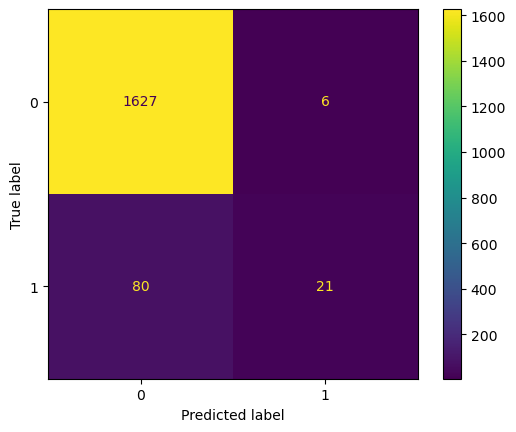

In [22]:
def support_vector(Xtrain,ytrain,Xtest,ytest):
    SVector = SVC(C=0.01,gamma=0.1,kernel="poly",degree=3,coef0=10.0)
    SVector.fit(Xtrain,ytrain)
    print('ACCURACY OF THE MODEL : {} %'.format(round(SVector.score(Xtest,ytest)* 100,2)))
    y_sv_pred = SVector.predict(Xtest)
    confusionMatrix = confusion_matrix(ytest,y_sv_pred)
    print('')
    print('CLASSIFICATION REPORT')
    target_names = ['No Damage', 'Damage']
    print(classification_report(ytest,y_sv_pred, target_names=target_names))
    print('')
    print('CONFUSION MATRIX')
    confusionMatrix = confusion_matrix(ytest,y_sv_pred)
    ConfusionMatrixDisplay(confusionMatrix).plot()
    
    
support_vector(Xtrain,ytrain,Xtest,ytest)

From the above result, we can observe that SVC generalizes better than other models as it tries to maximum the distance between the data points for classifying the data.

This model has better precision in predicting both damaged and undamaged vehicles

## NAIVE_BAYES CLASSIFIER

Naïve Bayes Classifier is one of the simple and most effective Classification algorithms to make quick predictions. It is a probabilistic classifier that predicts on the basis of the probability of an object.

It calculates the probability of a class given a set of feature values (i.e. p(yi | x1, x2 , … , xn)). Input this into Bayes' theorem: p(x1, x2 , … , xn | yi) means the probability of a specific combination of features given a class label.

ACCURACY OF THE MODEL : 89.85 %

              precision    recall  f1-score   support

   No Damage       0.97      0.92      0.94      1633
      Damage       0.30      0.57      0.40       101

    accuracy                           0.90      1734
   macro avg       0.64      0.75      0.67      1734
weighted avg       0.93      0.90      0.91      1734


CONFUSION MATRIX


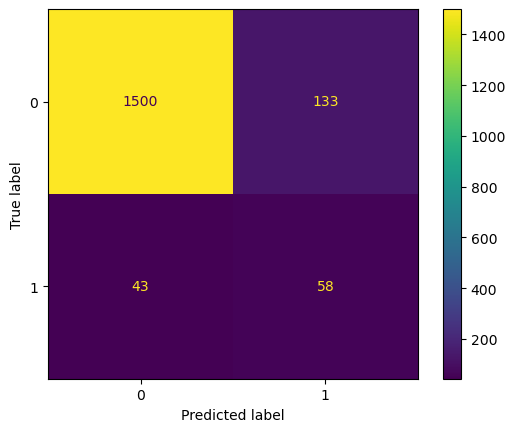

In [23]:
def naive_bayes(Xtrain,ytrain,Xtest,ytest):
    nb_model = GaussianNB()
    nb_model.fit(Xtrain,ytrain)
    print('ACCURACY OF THE MODEL : {} %'.format(round(nb_model.score(Xtest,ytest)* 100,2)))
    y_nb_pred = nb_model.predict(Xtest)
    print('')
    target_names = ['No Damage', 'Damage']
    print(classification_report(ytest,y_nb_pred, target_names=target_names))
    print('')
    print('CONFUSION MATRIX')
    confusionMatrix = confusion_matrix(ytest,y_nb_pred)
    ConfusionMatrixDisplay(confusionMatrix).plot()

naive_bayes(Xtrain,ytrain,Xtest,ytest)

For the given data, the naive bayes classifier doesnt seem to generalize better when compared with other models. BUt it is interesting to note it has less FALSE NEGATIVES = 43 compared to others

## NEURAL NETWORK - MLP CLASSIFIER

MLP Classifier model optimizes the log-loss function using LBFGS or stochastic gradient descent.

It trains iteratively since at each time step the partial derivatives of the loss function with respect to the model parameters are computed to update the parameters. We can add regularization term to the loss function that shrinks model parameters to prevent overfitting.

This implementation works with data represented as dense numpy arrays or sparse scipy arrays of floating point values.

ACCURACY OF THE MODEL : 94.29 %

CLASSIFICATION REPORT
              precision    recall  f1-score   support

   No Damage       0.95      1.00      0.97      1633
      Damage       0.56      0.09      0.15       101

    accuracy                           0.94      1734
   macro avg       0.75      0.54      0.56      1734
weighted avg       0.92      0.94      0.92      1734


CONFUSION MATRIX


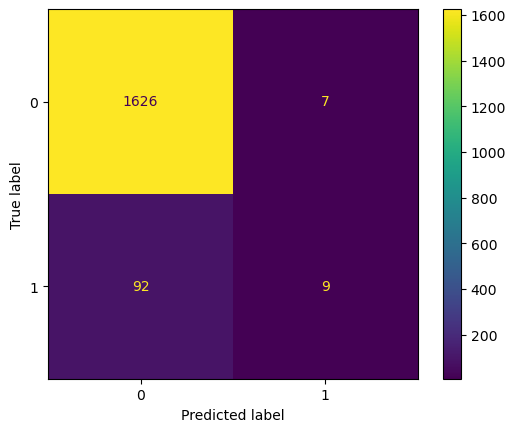

In [24]:
def neural_classifier(Xtrain,ytrain,Xtest,ytest):
    nn_model = MLPClassifier(hidden_layer_sizes=(10,20,50,20,10), activation='relu',
                         learning_rate='adaptive',solver='sgd')
    nn_model.fit(Xtrain,ytrain)
    print('ACCURACY OF THE MODEL : {} %'.format(round(nn_model.score(Xtest,ytest)* 100,2)))
    y_mlp_pred = nn_model.predict(Xtest)
    print('')
    print('CLASSIFICATION REPORT')
    target_names = ['No Damage', 'Damage']
    print(classification_report(ytest,y_mlp_pred, target_names=target_names))
    print('')
    print('CONFUSION MATRIX')
    confusionMatrix = confusion_matrix(ytest,y_mlp_pred)
    ConfusionMatrixDisplay(confusionMatrix).plot()    
    
neural_classifier(Xtrain,ytrain,Xtest,ytest)

This model generalized as the depth of the network increases as it learns and generalizes better.

For the given data, Trained the model with 5 hidden layers, reLu as activation function, SGD as optimization function and an adaptive learning rate give better results.


## GradientBoosting 

Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting.

ACCURACY OF THE MODEL : 94.81 %

CLASSIFICATION REPORT
              precision    recall  f1-score   support

   No Damage       0.96      0.99      0.97      1633
      Damage       0.64      0.25      0.36       101

    accuracy                           0.95      1734
   macro avg       0.80      0.62      0.67      1734
weighted avg       0.94      0.95      0.94      1734


CONFUSION MATRIX


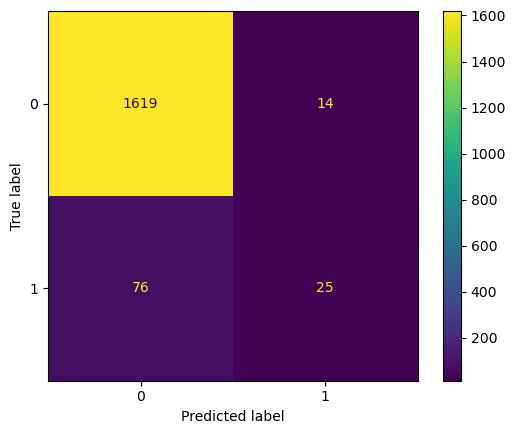

In [25]:
def gradient_boosting(Xtrain,ytrain,Xtest,ytest):
    GBC = GradientBoostingClassifier(loss = 'deviance',learning_rate = 0.01,n_estimators=500,max_depth=5,max_features='log2')
    GBC.fit(Xtrain,ytrain)
    print('ACCURACY OF THE MODEL : {} %'.format(round(GBC.score(Xtest,ytest)* 100,2)))
    y_gbc_pred = GBC.predict(Xtest)
    print('')
    print('CLASSIFICATION REPORT')
    target_names = ['No Damage', 'Damage']
    print(classification_report(ytest,y_gbc_pred, target_names=target_names))
    print('')
    print('CONFUSION MATRIX')
    confusionMatrix = confusion_matrix(ytest,y_gbc_pred)
    ConfusionMatrixDisplay(confusionMatrix).plot()
    
gradient_boosting(Xtrain,ytrain,Xtest,ytest)

This algorithm builds an additive model that allows for the optimization of differentiable loss functions and gradient descent optimizations. In each stage n_classes_ regression trees are fit on the negative gradient of the loss function.

Hyper parameters are finely tuned to better results on each run. This model generalizes better and the results are consistent.


## Extreme Gradient Boosting

Extreme Gradient Boosting, or XGBoost for short is an efficient open-source implementation of the gradient boosting algorithm.

It is designed to be both computationally efficient in speed and performance


ACCURACY OF EXTREME GRADIENT BOOST MODEL : 94.69

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1633
           1       0.60      0.27      0.37       101

    accuracy                           0.95      1734
   macro avg       0.78      0.63      0.67      1734
weighted avg       0.94      0.95      0.94      1734


CONFUSION MATRIX


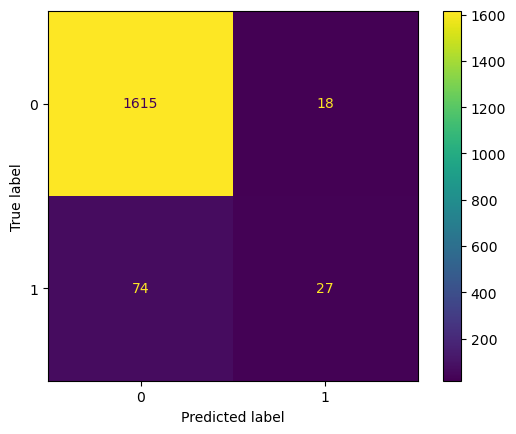

In [88]:
parameters = {
     "eta"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
     "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
     }

def xgb_classifier(Xtrain,ytrain,Xtest,ytest):
    xgba = XGBClassifier()
    grid = GridSearchCV(xgba,
                    parameters, n_jobs=4,
                    scoring="accuracy",
                    cv=3)
    grid.fit(Xtrain,ytrain)
    xgba_predicted = grid.predict(Xtest)
    xgba_acc_score = accuracy_score(ytest, xgba_predicted)
    print('')
    print("ACCURACY OF EXTREME GRADIENT BOOST MODEL : {}".format(round(xgba_acc_score*100,2)))
    print('')
    print('CLASSIFICATION REPORT')
    target_names = ['No Damage', 'Damage']
    print(classification_report(ytest,xgba_predicted, target_names=target_names))
    print('')
    print('CONFUSION MATRIX')
    confusionMatrix = confusion_matrix(ytest,xgba_predicted)
    ConfusionMatrixDisplay(confusionMatrix).plot()
    
xgb_classifier(Xtrain,ytrain,Xtest,ytest)

To get good estimates of the XGB classifier, i thought it would be nice to push it to its limits by doing a gridsearch over a a group of hyper parameters space to find optimal parameter.

GridSearchCV does an extensive search over the hyperparameter space and finds the best fit for the model.

## ENSEMBLING : STACKING MODELS 

Stacking or Stacked Generalization is an ensemble machine learning algorithm that learns how to best combine the predictions from multiple well-performing machine learning models.

A Stacked generalization consists in stacking the output of individual estimator and use a classifier to compute the final prediction. Stacking allows to use the strength of each individual estimator by using their output as input of a final estimator.

In [26]:
# Creating a stacked models with hyperparameters for each individual classifier

def stacked_model():
    
    # BASE MODELS
    
    dt  = DecisionTreeClassifier(criterion='entropy')
    
    rfc =  RandomForestClassifier(n_estimators=500,max_features=0.25,criterion='entropy')
    
    gbc = GradientBoostingClassifier(loss = 'deviance',learning_rate = 0.01,n_estimators=500,max_depth=3,max_features='log2')
    
    
    svc = SVC(kernel='poly',C=0.01,gamma=0.1,degree=3,coef0=10.0)
    
    xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6)
    
    
    # META MODEL
    # for classification problem by default the metamodel is LR, for Regression it is Linear Regression
    
    metamodel = LogisticRegression(C=1,penalty='l2',fit_intercept=True)
    
    
    # STACKING OF CLASSIFIERS

    model = StackingCVClassifier(classifiers=[dt,rfc,gbc,svc,xgb],meta_classifier=metamodel,random_state=103)
    
    return model

In [27]:
# create a dictionary for models

def loading_models():
    models = dict()
    models['Logistic Regression'] = LogisticRegression(C=1.5,penalty='l2',fit_intercept=True)
    models['Decision Tree'] = DecisionTreeClassifier()
    models['Random Forest'] = RandomForestClassifier(n_estimators=500,max_features=0.25,criterion='entropy')
    models['Support Vector'] = SVC(C=0.01,gamma=0.1,kernel="poly",degree=3,coef0=10.0)
    models['Gradient Boosting'] =  GradientBoostingClassifier(loss = 'deviance',learning_rate = 0.01,n_estimators=500,max_depth=3,max_features='log2')
    models['Xtreme Gradient'] = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)

    models['Stacked Model'] = stacked_model()
    return models

In [28]:
# evaluate the models using cross-validation
from sklearn.model_selection import cross_validate

def evaluating_model(model,X,y):
    scoring = ['accuracy','precision','recall','f1']
    cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
    scores = cross_validate(model,X,y,cv=cv,scoring=scoring,n_jobs=-1,error_score='raise')
    return scores

In [29]:
# Results: Experiment with  raw data 

models = loading_models()

# evaluate the  models and store the results
results,names = list(),list()

for name,model in tqdm(models.items()):

    scores = evaluating_model(model,Xx,yy)
    results.append(scores)
    names.append(name)

    
# Final Results
      
results_df = pd.DataFrame(columns=['ACCURACY(%)','PRECISION(%)','RECALL(%)','F1_SCORE(%)'],)

for dic,name in zip(results,names):
    accuracy = np.mean((dic['test_accuracy']*100))
    precision = np.mean(dic['test_precision']*100)
    recall = np.mean(dic['test_recall']*100)
    f1_score = np.mean(dic['test_f1']*100)
    
    results_df.loc[name] = [accuracy,precision,recall,f1_score]

# results_df.to_csv('results_df1.csv')
results_df.round(1)

  0%|          | 0/7 [00:00<?, ?it/s]

,ACCURACY(%),PRECISION(%),RECALL(%),F1_SCORE(%)
Logistic Regression,95.1,66.3,32.7,43.0
Decision Tree,92.2,35.0,38.1,36.2
Random Forest,95.1,67.6,31.1,41.9
Support Vector,94.9,70.9,23.0,34.2
Gradient Boosting,95.0,66.0,31.8,42.3
Xtreme Gradient,94.2,0.0,0.0,0.0
Stacked Model,94.9,67.1,25.0,35.8


From the above, we can observe that the stacked model as adopted the characterstics of the better performing model which generalises better, in this case is Support Vector Classifier.

### FINALIZING THE MODEL
#### Training on Whole Dataset

In [30]:
# Model Performance on the Test data
# Picked only the final estimator after stacking is performed
stackedModel = stacked_model()
stackedModel.fit(Xtrain,ytrain)
print('Final stacked Model Accuracy : {:0.2f} %'.format(stackedModel.score(Xtest,ytest)*100))

Final stacked Model Accuracy : 95.04 %


Evaluating the stacked model performance on test data

In [173]:
stackedModel.predict([X.iloc[15,:].values])

array([0], dtype=int64)

## CONFUSION MATRIX

### Plotting the confusion matrix

The confusion matrix is a fundamental tool for evaluating classification models. You can create a heatmap of the confusion matrix to visualize true positives, true negatives, false positives, and false negatives.


TEST DATASET SIZE : 1734

TRUE NEGATIVES  : 21
FALSE POSITIVIES : 6
TRUE POSITIVES   : 1627
FALSE NEGATIVES  : 80

Classification Report

              precision    recall  f1-score   support

    NoDamage       0.95      1.00      0.97      1633
      Damage       0.78      0.21      0.33       101

    accuracy                           0.95      1734
   macro avg       0.87      0.60      0.65      1734
weighted avg       0.94      0.95      0.94      1734


CONFUSION MATRIX


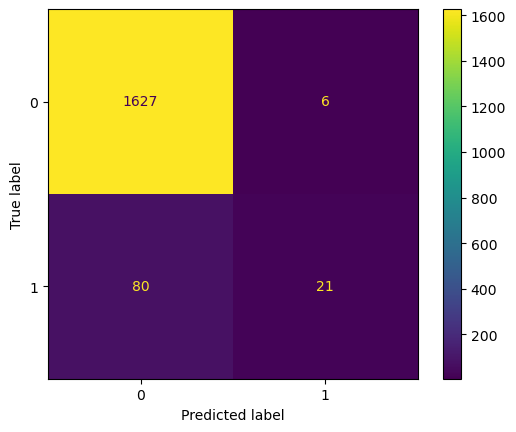

In [31]:
y_stacked_pred = stackedModel.predict(Xtest)

confusionMatrix = confusion_matrix(ytest,y_stacked_pred)
print()
print('TEST DATASET SIZE : {}'.format(len(Xtest)))
print('')
print('TRUE NEGATIVES  : {}'.format(confusionMatrix[1][1]))
print('FALSE POSITIVIES : {}'.format(confusionMatrix[0][1]))
print('TRUE POSITIVES   : {}'.format(confusionMatrix[0][0]))
print('FALSE NEGATIVES  : {}'.format(confusionMatrix[1][0]))

print()
print('Classification Report')
print()
classNames = ['NoDamage', 'Damage']
print(classification_report(ytest,y_stacked_pred, target_names=classNames))
print('')
print('CONFUSION MATRIX')
confusionMatrix = confusion_matrix(ytest,y_stacked_pred)
ConfusionMatrixDisplay(confusionMatrix).plot()

###  ROC Curve and AUC

Receiver Operating Characteristic (ROC) curves and Area Under the Curve (AUC) are useful for visualizing the trade-off between true positive rate (sensitivity) and false positive rate (1-specificity) across different threshold values.

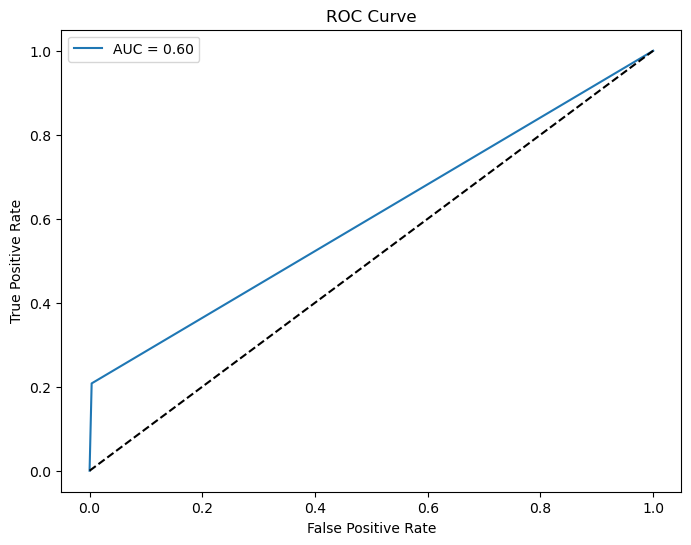

In [32]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(ytest,y_stacked_pred)
auc = roc_auc_score(ytest, y_stacked_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Precision-Recall Curve

Precision-Recall curves are useful when dealing with imbalanced datasets. They show the trade-off between precision and recall.

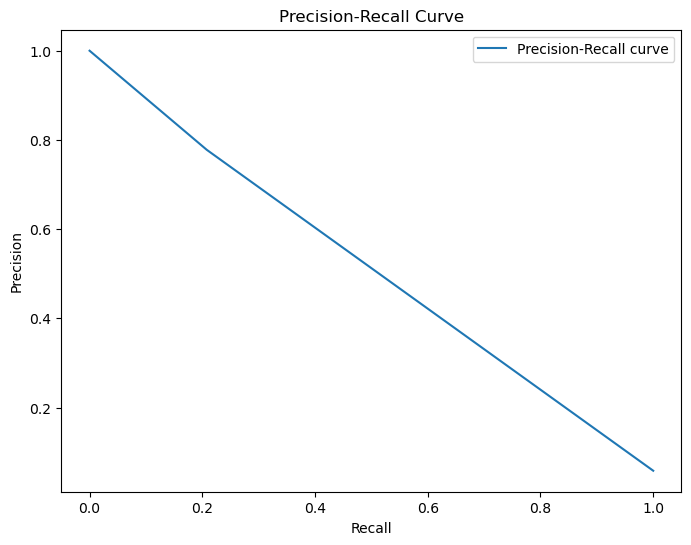

In [33]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(ytest,y_stacked_pred)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

### Learning Curves

Learning curves can help you assess if your model is overfitting or underfitting. Plot the training and validation performance against the number of samples.

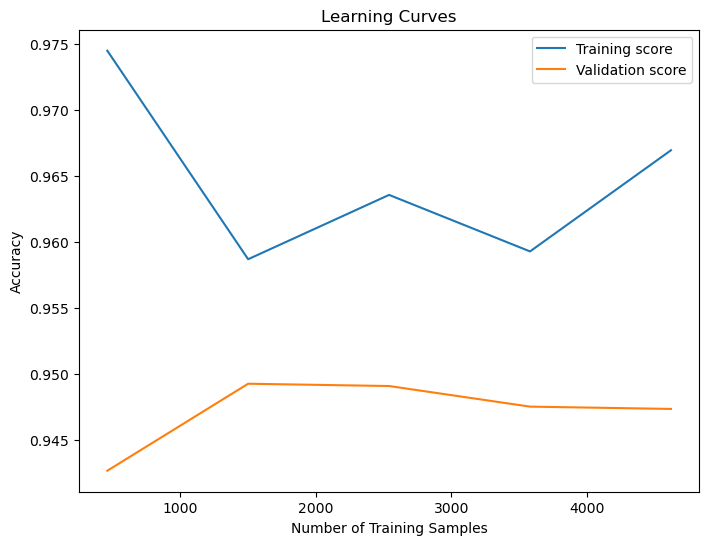

In [34]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(stackedModel, Xx, yy, cv=5)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(valid_scores, axis=1), label='Validation score')
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.show()

### Model Calibration Curve

This curve helps you assess if your model's predicted probabilities are well-calibrated (i.e., they represent true probabilities).

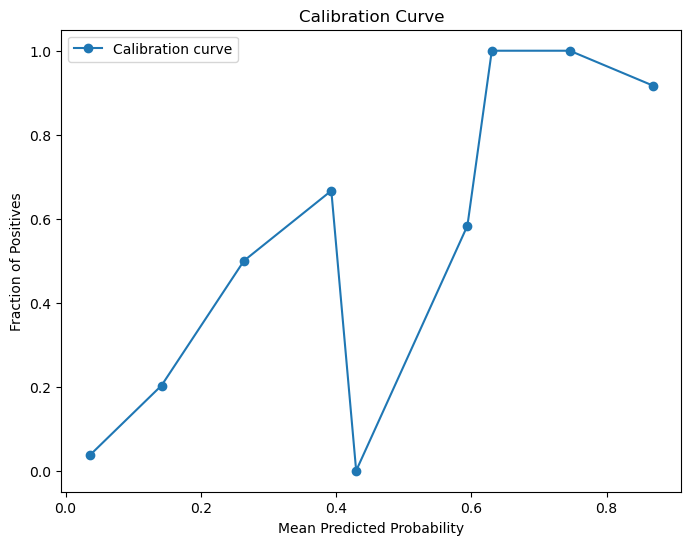

In [35]:
from sklearn.calibration import calibration_curve

yprobs = stackedModel.predict_proba(Xtest)[:, 1]

prob_true, prob_pred = calibration_curve(ytest, yprobs, n_bins=10)

plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Calibration curve')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve')
plt.legend()
plt.show()

## SAVING THE MODEL
### using joblib

In [36]:
# saving the model to use it in applications
import joblib
FailPred_Model = 'failure_prediction.sav'
joblib.dump(stackedModel,FailPred_Model)

stacked_output = joblib.load(FailPred_Model)

result_jbl = stacked_output.score(Xtest,ytest)
print('ACCURACY OF THE MODEL : {} %'.format(round(result_jbl * 100,2)))

ACCURACY OF THE MODEL : 95.04 %


## DATABASE FOR ETL 


### TABLE 1 :  tbl_fleetdata
#### WRITING DATA TO SQL SERVER DATABASE 

In [47]:
# MS SQL 
servername  = r'VICKYS\SQLEXPRESS'
database    = 'AVLDatabase'

myconnect   = pyodbc.connect('Driver= {SQL Server};Server='+servername+';Database = '+database+';Trusted_connection=yes')

cursor = myconnect.cursor()

for index, row in etl1_df.iterrows():
    # Define the SQL INSERT statement based on your table structure
    insert_query = f"""
    INSERT INTO [AVLDatabase].[dbo].[tbl_fleetdata] (TONDUR, EngSpDist_K1, EngSpDist_K2, EngSpDist_K3, EngSpDist_K4, 
                               EngSpDist_K5, EngSpDist_K6, EngSpDist_K7, EngSpDist_K8, AmbTempDist_K8, 
                               AmbTempDist_K9, MILEAGE, LABEL)
    VALUES ({row['TONDUR']}, {row['EngSpDist_K1']}, {row['EngSpDist_K2']}, {row['EngSpDist_K3']}, 
            {row['EngSpDist_K4']}, {row['EngSpDist_K5']}, {row['EngSpDist_K6']}, {row['EngSpDist_K7']}, 
            {row['EngSpDist_K8']}, {row['AmbTempDist_K8']}, {row['AmbTempDist_K9']}, {row['MILEAGE']}, 
            {row['LABEL']})
    """

    # Execute the SQL statement using the cursor
    cursor.execute(insert_query)
    
# Commit the changes to the database
myconnect.commit()
cursor.close()
myconnect.close()

In [48]:
import pyodbc
from sqlalchemy import create_engine

# MS SQL 
servername  = r'VICKYS\SQLEXPRESS'
database    = 'AVLDatabase'

myconnect   = pyodbc.connect('Driver= {SQL Server};Server='+servername+';Database = '+database+';Trusted_connection=yes')

cursor = myconnect.cursor()

for index, row in etl2_df.iterrows():
    # Define the SQL INSERT statement based on your table structure
    insert_query = f"""
    INSERT INTO [AVLDatabase].[dbo].[tbl_vehicledata] (PSEUDO_VIN,TONDUR, EngSpDist_K1, EngSpDist_K2, EngSpDist_K3, EngSpDist_K4, 
                               EngSpDist_K5, EngSpDist_K6, EngSpDist_K7, EngSpDist_K8, AmbTempDist_K8, 
                               AmbTempDist_K9, MILEAGE, LABEL)
    VALUES ({row['PSEUDO_VIN']},{row['TONDUR']}, {row['EngSpDist_K1']}, {row['EngSpDist_K2']}, {row['EngSpDist_K3']}, 
            {row['EngSpDist_K4']}, {row['EngSpDist_K5']}, {row['EngSpDist_K6']}, {row['EngSpDist_K7']}, 
            {row['EngSpDist_K8']}, {row['AmbTempDist_K8']}, {row['AmbTempDist_K9']}, {row['MILEAGE']}, 
            {row['LABEL']})
    """

    # Execute the SQL statement using the cursor
    cursor.execute(insert_query)
    
# Commit the changes to the database
myconnect.commit()
cursor.close()
myconnect.close()

### TABLE 2 :  tbl_vehicledata
#### WRITING DATA TO SQL SERVER DATABASE 

### READING DATA FROM SQL SERVER DATABASE

In [37]:
# MS SQL 
servername  = r'VICKYS\SQLEXPRESS'
database    = 'AVLDatabase'

connection_string = 'Driver= {SQL Server};Server='+servername+';Database = '+database+';Trusted_connection=yes'

DBConnection   = pyodbc.connect(connection_string) 

query = f'SELECT * from [AVLDatabase].[dbo].[tbl_fleetdata]'

df = pd.read_sql(query,DBConnection)

df.head()

,VehicleID,TONDUR,EngSpDist_K1,EngSpDist_K2,EngSpDist_K3,EngSpDist_K4,EngSpDist_K5,EngSpDist_K6,EngSpDist_K7,EngSpDist_K8,AmbTempDist_K8,AmbTempDist_K9,MILEAGE,LABEL
0,1,1249456.1,239471.8,443507.3,230166.7,18955.4,3453.7,1631.0,748.4,373.2,155,0,35008,0
1,2,2221482.5,868673.2,862615.7,154180.3,12707.2,2885.7,951.6,466.9,255.2,167,1,14959,0
2,3,3433681.7,822744.4,1954545.1,366699.7,26077.9,1452.6,238.2,91.5,47.4,261,2,37685,0
3,4,615134.7,138935.2,209138.3,106259.6,10133.9,1111.9,230.7,81.5,49.9,112,2,7054,0
4,5,2141362.5,797644.6,729555.5,242742.9,13288.6,2374.5,815.7,341.1,175.1,229,2,19680,0


## API DEVELOPMENT


### DELETE API Endpoint

In [44]:
import requests

# delete API endpoint URL
url = "http://127.0.0.1:5000/3656" 

headers = {'content-type': 'application/json', 'Accept-Charset': 'UTF-8'}

try:
    response = requests.delete(url, headers=headers)

    if response.status_code == 200:
        print("VEHICLE PSEUDO_VIN DELETE SUCCESSFUL")
        
    elif response.status_code == 404:
        print("VEHICLE NOT FOUND")
        
    else:
        print(f"VEHICLE DELETE REQUEST FAILED WITH STATUS CODE {response.status_code}:")
        print(response.text)

except Exception as e:
    print(f" ERROR : {str(e)}")


VEHICLE PSEUDO_VIN DELETE SUCCESSFUL


## Model Inference API Endpoint

### POST METHOD

In [41]:
import requests
import pandas as pd
import numpy as np
import json
from sklearn.preprocessing import StandardScaler, MinMaxScaler


url = 'http://127.0.0.1:5000/failure_pred_api'

api_df = etl1_df.copy()

api_X = api_df.drop('LABEL',axis=1)

api_X = api_X.values

# Scaling the Input

# X = StandardScaler().fit_transform(X.values)
    
data = [(api_X[1]).tolist()]
    
print('PRINTING INPUT DATA')
print(data)

# Request object as JSON to the MODEL
j_data = json.dumps(data)

headers = {'content-type': 'application/json', 'Accept-Charset': 'UTF-8'}
response = requests.post(url, data=j_data, headers=headers)

print('RESPONSE CODE : {}'.format(response.status_code))
print('NO DAMAGE PROBABILITY   : {} %'.format(round(float(response.json().strip('[]').split()[0]),2)*100))
print('DAMAGE PROBABILITY      : {} %'.format(round(float(response.json().strip('[]').split()[1]),2)*100))
print('---------------')
# print(' Model Result   : {} '.format(int(r.json().strip('[]').split()[0])))

PRINTING INPUT DATA
[[2221482.5, 868673.2, 862615.7, 154180.3, 12707.2, 2885.7, 951.6, 466.9, 255.2, 167.0, 1.0, 14959.0]]
RESPONSE CODE : 200
NO DAMAGE PROBABILITY   : 86.0 %
DAMAGE PROBABILITY      : 14.000000000000002 %
---------------
